In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [109]:
data = pd.read_csv('911.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [111]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 Zipcode

In [112]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp)

In [113]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique Title Counts

In [114]:
data['title'].nunique()

110

There are EMS, Fire and Traffic in title column. Use .apply() with custom lambda exp to create a new column called "Reason" contains string value. Ex. EMS: BACK PAINS/INJURY, return EMS in Reason column

In [115]:
x = data['title'].iloc[0]

In [116]:
x.split(':')[0]

'EMS'

In [117]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])
data['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

Most common Reason for a 911 call

In [118]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Create countplot 911 calls by Reason using Seaborn

In [119]:
import seaborn as sns

<Axes: xlabel='Reason', ylabel='count'>

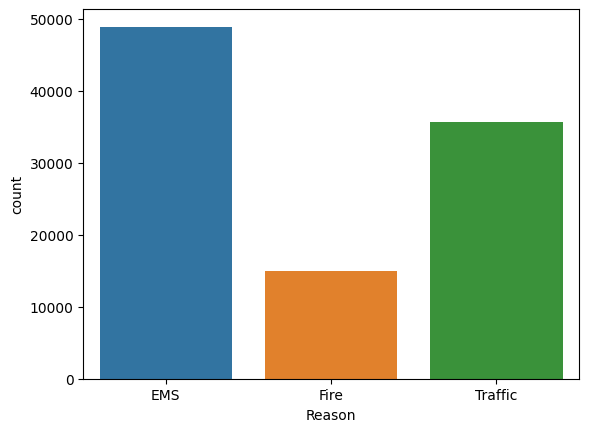

In [120]:
sns.countplot(x=data['Reason'], data=data)

Data type of the objects in the timeStamp column

In [121]:
type(data['timeStamp'].iloc[0])

str

Use pd.to_datetime to convert the column from strings to DateTime objects

In [122]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
data['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [123]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [124]:
time = data['timeStamp'].iloc[0]
time.hour # minute, second, month, year, dayofweek, etc.

17

In [125]:
data['Hour'] = data['timeStamp'].apply(lambda timeStamp: timeStamp.hour )
data['Month'] = data['timeStamp'].apply(lambda timeStamp: timeStamp.month )
data['Day of Week'] = data['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek )
data['Year'] = data['timeStamp'].apply(lambda timeStamp: timeStamp.year )

In [126]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015


Use .map() to map the actual string names to the day of the week

In [127]:
daymap = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu', 
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

In [128]:
data['Day of Week'] = data['Day of Week'].map(daymap)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015


Create countplot of the Day of Week column using Seaborn with the hue based off of the Reason column

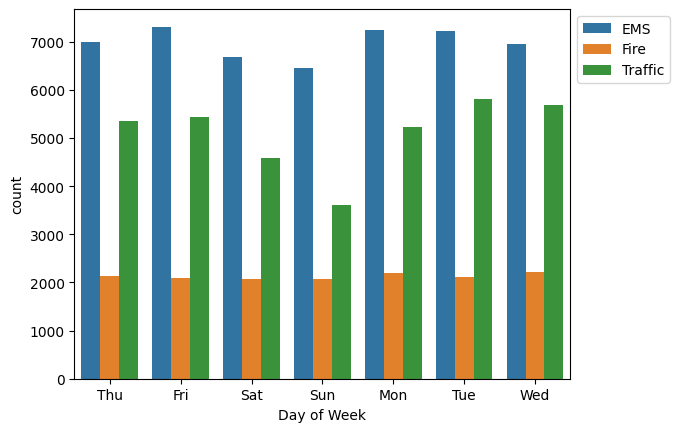

In [129]:
sns.countplot(x = data['Day of Week'], data=data, hue=data['Reason'])

# Move the legend to outside
plt.legend(bbox_to_anchor=(1,1), loc=2)